Data Workshop 6

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from scipy.optimize import curve_fit

Exercise 1

In [3]:
chrome=loadtxt('chromatogram_ion126.dat')

In [4]:
time=chrome[:,0]
intensity=chrome[:,1]

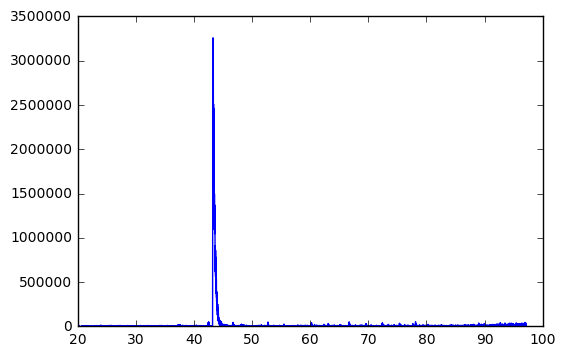

In [5]:
plot(time,intensity, marker='', linestyle='-')
show()

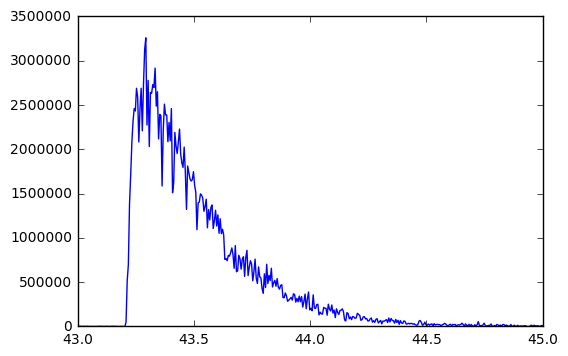

In [6]:
plot(time,intensity, marker='', linestyle='-')
xlim(43,45)
show()

In [7]:
def gly_intensity(t,a,b,t0):
    "Fitting function allowing a fast rise and a slow exponential tail"
    x=(abs(t-t0)+(t-t0))/2. # This is a trick used so that the function returns 0 when t<t0. Can you understand what is being done?
    return a*x*e**(-x/b)

In [10]:
chcurve=curve_fit(gly_intensity, time, intensity,p0=(3000000,1,43))
chparams=chcurve[0]
chparams

array([  4.99824215e+07,   1.39683491e-01,   4.31896430e+01])

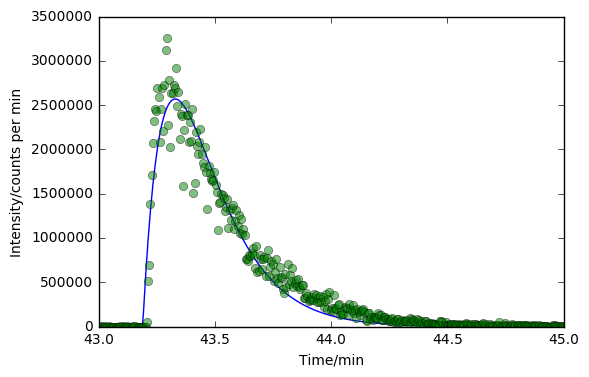

In [15]:
cha=chparams[0]
chb=chparams[1]
cht0=chparams[2]
chx=(abs(time-cht0)+(time-cht0))/2
ych=cha*chx*e**(-chx/chb)
plot(time,ych,marker='', linestyle='-')
plot(time, intensity, marker='o', linestyle='', alpha=0.5)
xlim(43,45)
xlabel('Time/min')
ylabel('Intensity/counts per min')
show()

In [16]:
Area=cha*chb**2
Area

975230.89486381796

In [17]:
chres=ych-intensity

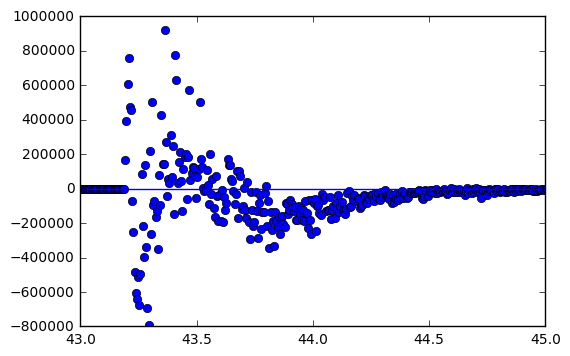

In [19]:
plot(time, chres,marker='o', linestyle='')
axhline(0)
xlim(43,45)
show()

In [21]:
ngly=((Area/(9.538*10**6))+(7*10**-4))/(8.33*10**4)
ngly

1.2358570958647474e-06

In [24]:
conc=ngly/(1*10**-6)
conc

1.2358570958647475

Exercise 2

In [25]:
def g1(x1,a1,s,x0):
    "Gaussian curve 1"
    return a1*e**(-(x1-x0)**2/(2*s**2))

In [26]:
def g2(x1,a1,s,d):
    "Gaussian curve 2"
    return g1(x1,a1,s,d)+g1(x1,a1,s,-d)

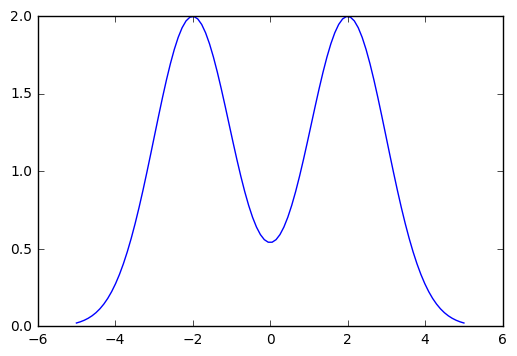

In [48]:
x1=linspace(-5,5,100)
a1=2 #controls height
s=1 #controls sharpness
d=2 #controls if the sum adds in phase or out of phase
plot(x1, g2(x1,a1,s,d), marker='', linestyle='-')
show()

In [49]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

In [53]:
d1=linspace(-5,5,100)

In [54]:
mesh=meshgrid(x1,d1)
X1=mesh[0]
D=mesh[1]

In [55]:
Z_data=g2(X1,a1,s,D)

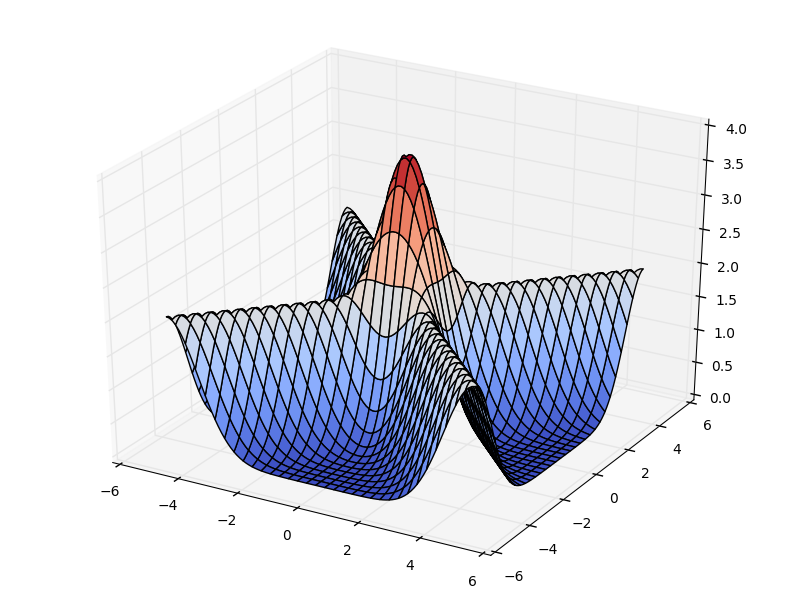

In [61]:
figure(figsize=(10,7.5))
ax=gca(projection='3d')
ax.plot_surface(X1, D, Z_data, rstride=3, cstride=3, cmap=cm.coolwarm)
show()

Exercise 3

In [67]:
data=loadtxt('anthracene_fluo.dat', skiprows=16)

In [71]:
wavelength=data[:,0]
intensity1=data[:,1]

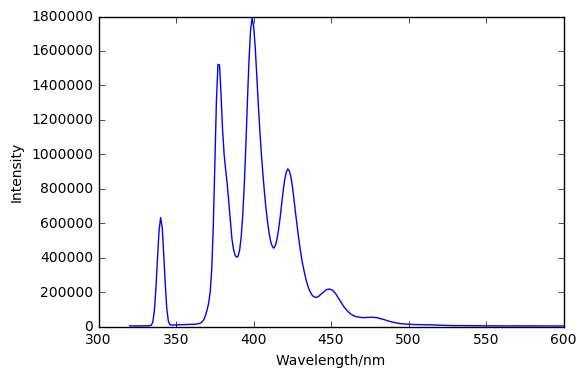

In [73]:
plot(wavelength, intensity1, marker='', linestyle='-')
xlabel('Wavelength/nm')
ylabel('Intensity')
show()

In [227]:
x3=linspace(-1000,1000,1000000)
a3=650000
s3=2.5
d3=0
a4=1550000
s4=4.5
d4=40
a5=1800000
s5=6
d5=60
a6=900000
s6=8
d6=85
a7=220000
s7=8
d7=110
a8=50000
s8=10
d8=140

In [228]:
def g3(x3,a3,s3,d3,a4,s4,d4,a5,s5,d5,a6,s6,d6,a7,s7,d7,a8,s8,d8):
    "Gaussian curve 3"
    return g1(x3,a3,s3,d3)+g1(x3,a4,s4,d4)+g1(x3,a5,s5,d5)+g1(x3,a6,s6,d6)+g1(x3,a7,s7,d7)+g1(x3,a8,s8,d8)

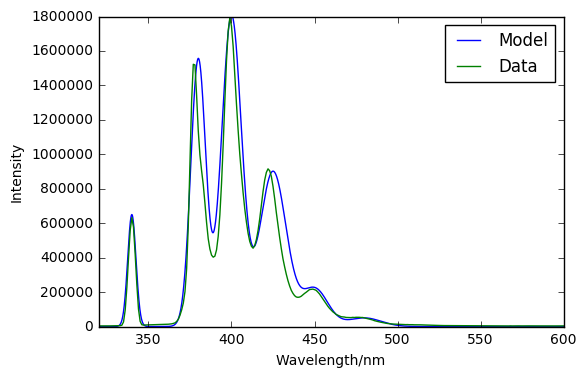

In [230]:
plot(x3+340,g3(x3,a3,s3,d3,a4,s4,d4,a5,s5,d5,a6,s6,d6,a7,s7,d7,a8,s8,d8), marker='', linestyle='-', label='Model')
plot(wavelength, intensity1, marker='', linestyle='-', label='Data')
xlabel('Wavelength/nm')
ylabel('Intensity')
xlim(320,600)
ylim(0,1800000)
legend()
show()

In [237]:
def g4(x3,a3,s3,d3):
    "Gaussian 4"
    return g1(x3,a3,s3,d3)

In [238]:
def g5(x3,a4,s4,d4):
    "Gaussian 5"
    return g1(x3,a4,s4,d4)

In [239]:
def g6(x3,a5,s5,d5):
    "Gaussian 6"
    return g1(x3,a5,s5,d5)

In [240]:
def g7(x3,a6,s6,d6):
    "Gaussian 7"
    return g1(x3,a6,s6,d6)

In [241]:
def g8(x3,a7,s7,d7):
    "Gaussian 8"
    return g1(x3,a7,s7,d7)

In [242]:
def g9(x3,a8,s8,d8):
    "Gaussian 9"
    return g1(x3,a8,s8,d8)

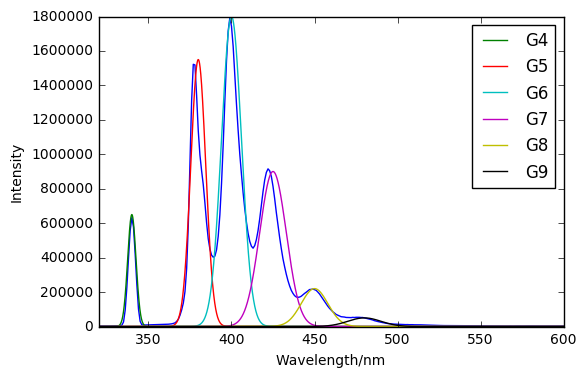

In [243]:
plot(wavelength, intensity1, marker='', linestyle='-')
plot(x3+340,g4(x3,a3,s3,d3), label='G4')
plot(x3+340,g5(x3,a4,s4,d4), label='G5')
plot(x3+340,g6(x3,a5,s5,d5), label='G6')
plot(x3+340,g7(x3,a6,s6,d6), label='G7')
plot(x3+340,g8(x3,a7,s7,d7), label='G8')
plot(x3+340,g9(x3,a8,s8,d8), label='G9')
xlabel('Wavelength/nm')
ylabel('Intensity')
xlim(320,600)
legend()
show()

In [244]:
peaknum=array([1.522433e+006,1.792139e+006,9.153805e+005,2.171816e+005])
peakwave=array([3.770000e+002,3.990000e+002,4.220000e+002,4.490000e+002])

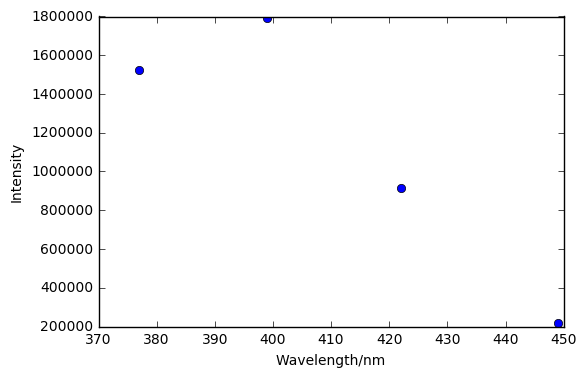

In [246]:
plot(peakwave,peaknum,marker='o', linestyle='')
xlabel('Wavelength/nm')
ylabel('Intensity')
show()

There are sharp peaks at about 375 and 400nm and broader peaks at about 425 and 450nm.